In [1]:
# Plotting the solution to the Riccati equation given by Kendall & McKendrick

In [1]:
import numpy as np
from numpy import tanh, arctanh
from matplotlib import pyplot as plt

In [1]:
def SIR(beta, gamma, N, I0, T, methode, t_0 = 0):
    S0 = N - I0
    rho = gamma/beta * N
    mu = (S0/rho - 1)
    delta = (rho**2)/S0
    alpha = np.sqrt(mu**2 + 2*(N-S0)/delta)
    phi = arctanh(mu/alpha) + (alpha*gamma*t_0)/2
    t = np.arange(T + 1)
    R = delta*(mu + alpha * tanh(alpha*gamma*t/2-phi))
    I = alpha**2 * delta/2 * (1-tanh(alpha*gamma*t/2-phi)**2)

    if methode == 1:
        S = rho * (-alpha*tanh(alpha*gamma*t/2-phi)+1)
        S_string = "S^*(t)"
    elif methode == 2:
        S = N - I - R
        S_string = "\\tilde S(t)"

    fig, ax = plt.subplots(figsize = (8,5))
    ax.margins(0.05)
    ax.set_title(f"$\hat \\beta = {str(round(beta,4))}, \\gamma = 1/{str(int(1/gamma))}, I_0 = {str(I0)}, N = {int(N)}$", fontsize = 18)
    ax.plot(t,S, label=f"${S_string}$", color="green",)
    ax.plot(t,I, label="$I^*(t)$", color="red",)
    ax.plot(t,R, label="$R^*(t)$", color="blue",)
    plt.rc('legend',fontsize=16)
    ax.legend()
    plt.show()

    # lim S(t) < 0, falls die folgende Bedingung gilt gamma/beta < 1 - S_0/2N
    print("gamma/beta =", gamma/beta)
    print("1-S_0/(2N) =", 1-S0/(2*N))
    print("2/(alpha^2 * gamma) =", 2/((alpha**2) * gamma))

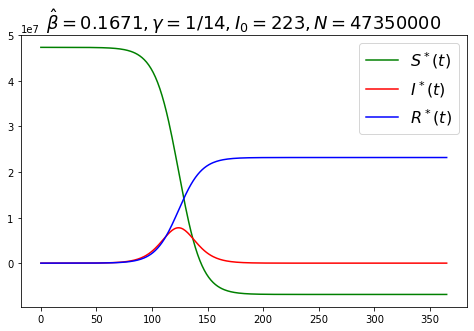

gamma/beta = 0.42746003248696246
1-S_0/(2N) = 0.5000023548046463
2/(alpha^2 * gamma) = 15.607455589508165


In [26]:
land = "ESP" 
if land == "DE":
    N = 83.24*10**6
    beta = 0.1940
    I0 = 20
elif land == "ESP":
    N = 47.35*10**6
    beta = 0.1671
    I0 = 223

SIR(beta=beta, gamma=1/14,N = N, I0=I0, t_0=0, T = 365, methode = 1)